<a href="https://colab.research.google.com/github/vsoos/DeepLearning/blob/main/ex1/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise project 1 – ANN for regression

In [ ]:
!pip install -q keras-tqdm

In [ ]:
# Data Preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm.keras import TqdmCallback
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

In [ ]:
folder_path = "/content/drive/MyDrive/deeplearning2024_VincenzinaSoos/ex_1"
os.chdir(folder_path)

In [ ]:
df = pd.read_csv("data/Folds5x2_pp.csv")
df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum',
                   'AP': 'Ambient Pressure', 'RH': 'Relative Humidity',
                   'PE': 'Net Hourly Electrical Energy Output'}, inplace=True)

In [ ]:
df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
X = df.drop("Net Hourly Electrical Energy Output", axis=1).values
y = df["Net Hourly Electrical Energy Output"].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
Dense = tf.keras.layers.Dense
Input = tf.keras.layers.Input
Dropout = tf.keras.layers.Dropout
Sequential = tf.keras.models.Sequential
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)

In [ ]:
# ANN Model
ann = tf.keras.Sequential([
    Input(shape=(4,)),
    Dense(units=6, activation="relu"),
    Dropout(0.2),
    Dense(units=6, activation="relu"),
    Dropout(0.2),
    Dense(units=1)
])

ann.compile(optimizer=optimizer, loss="mean_squared_error")

In [ ]:
ann.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 6)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79 (316.00 B)

 Trainable params: 79 (316.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = ann.fit(X_train, y_train, epochs=100, batch_size=32,
                  validation_data=(X_test, y_test), verbose=0, callbacks=[early_stopping, TqdmCallback(verbose=1)])

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

In [ ]:
# Error Metrics
predictions = ann.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R-squared: {r2}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
MAE: 30.15917975446647, MSE: 930.9542358103923, RMSE: 30.511542665201187, R-squared: -2.2534452005822816


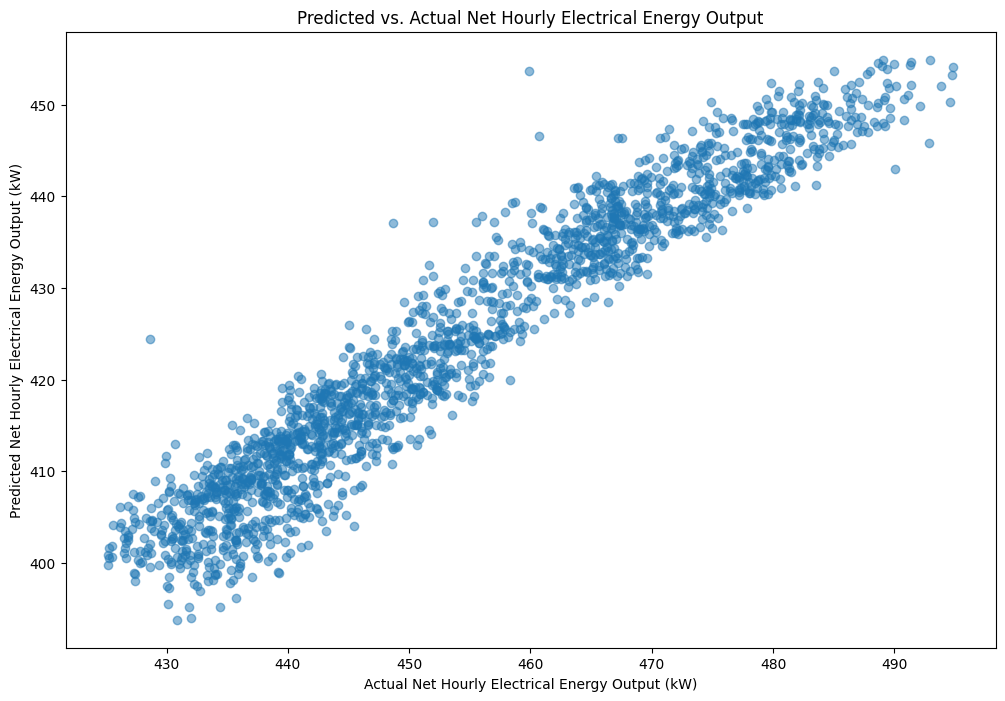

In [ ]:
# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Net Hourly Electrical Energy Output (kW)")
plt.ylabel("Predicted Net Hourly Electrical Energy Output (kW)")
plt.title("Predicted vs. Actual Net Hourly Electrical Energy Output")
plt.show()

## Imaginary Data

In [ ]:
imaginary_data = np.array([
    [15, 70, 1015, 60],
    [25, 60, 1010, 50],
    [35, 50, 1005, 40]
])
scaled_imaginary_data = scaler.transform(imaginary_data)

In [ ]:
imaginary_predictions = ann.predict(scaled_imaginary_data)
print("Imaginary Data Predictions:")
for i, pred in enumerate(imaginary_predictions):
    print(f"Input {i+1}: {imaginary_data[i]} => Predicted Output: {pred[0]:.2f} kW")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Imaginary Data Predictions:
Input 1: [  15   70 1015   60] => Predicted Output: 428.41 kW
Input 2: [  25   60 1010   50] => Predicted Output: 416.08 kW
Input 3: [  35   50 1005   40] => Predicted Output: 403.75 kW


## Boosting variables that significantly affect predictions

In [ ]:
corr = df.corr()["Net Hourly Electrical Energy Output"].sort_values(ascending=False)
print(corr)

Net Hourly Electrical Energy Output    1.000000
Ambient Pressure                       0.518429
Relative Humidity                      0.389794
Exhaust Vacuum                        -0.869780
Average Temperature                   -0.948128
Name: Net Hourly Electrical Energy Output, dtype: float64


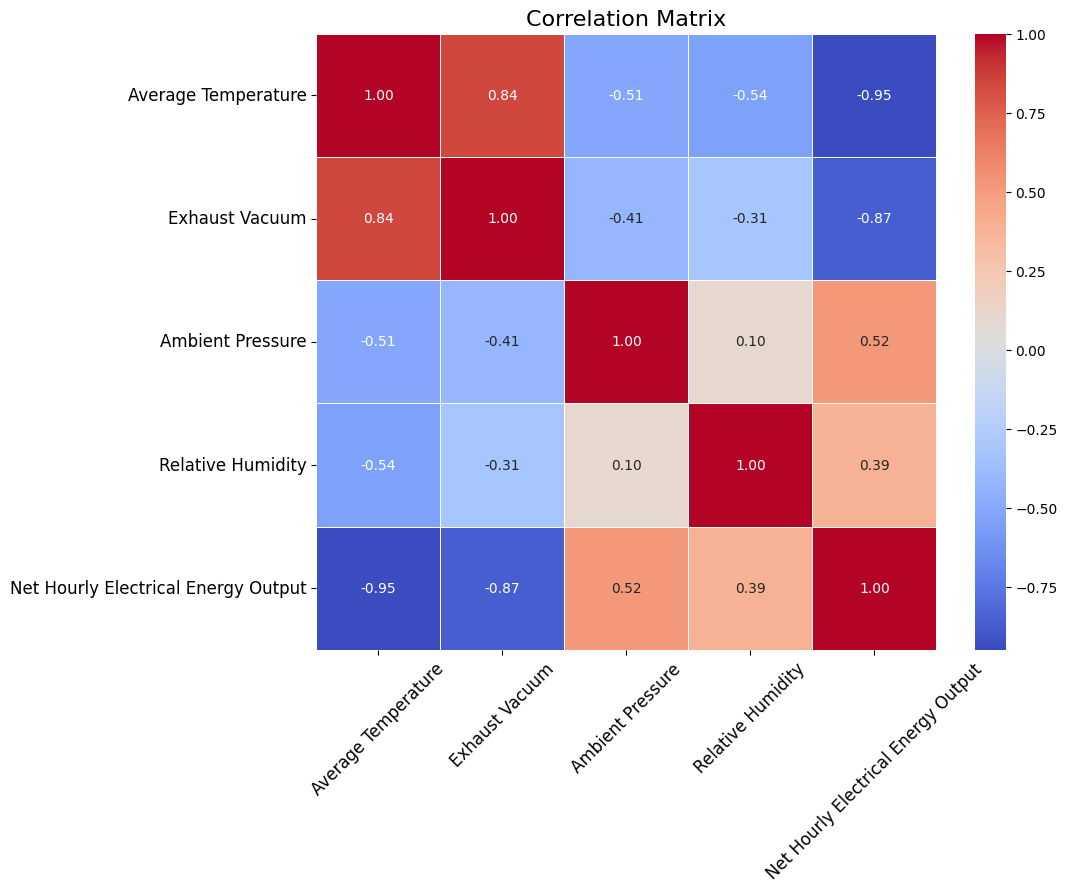

In [ ]:
# correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
print("Median of the Target:")
print(df['Net Hourly Electrical Energy Output'].median())

Median of the Target:
451.54999999999995


In [ ]:
# Baseline
baseline_values = np.array([[
    df['Average Temperature'].median(),
    df['Exhaust Vacuum'].median(),
    df['Ambient Pressure'].median(),
    df['Relative Humidity'].median()
]])
print("Baseline Values")
for feature, value in zip(df.columns[:-1], baseline_values[0]):  # Exclude the target column
    print(f"{feature}: {value:.2f}")

Baseline Values
Average Temperature: 20.34
Exhaust Vacuum: 52.08
Ambient Pressure: 1012.94
Relative Humidity: 74.97


In [ ]:
# Adjusted test data
imaginary_data = np.array([
    [baseline_values[0][0] * 1.50, baseline_values[0][1], baseline_values[0][2], baseline_values[0][3]],  # Temp
    [baseline_values[0][0], baseline_values[0][1] * 1.50, baseline_values[0][2], baseline_values[0][3]],  # Vacuum
    [baseline_values[0][0] * 1.50, baseline_values[0][1] * 1.50, baseline_values[0][2], baseline_values[0][3]],  # Both NEGcorr
    [baseline_values[0][0], baseline_values[0][1], baseline_values[0][2] * 1.50, baseline_values[0][3]], # Ambient Pressure
])

print("\nImaginary Test Data:")
for i, row in enumerate(imaginary_data):
    print(f"Scenario {i+1}: {row}")


Imaginary Test Data:
Scenario 1: [  30.5175   52.08   1012.94     74.975 ]
Scenario 2: [  20.345   78.12  1012.94    74.975]
Scenario 3: [  30.5175   78.12   1012.94     74.975 ]
Scenario 4: [  20.345   52.08  1519.41    74.975]


In [ ]:
scaled_imaginary_data = scaler.transform(imaginary_data)

In [ ]:
scaled_impact_data = scaler.transform(imaginary_data)
impact_predictions = ann.predict(scaled_impact_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
predictions = ann.predict(scaled_imaginary_data)

print("\nPredictions for Imaginary Data:")
for i, pred in enumerate(predictions):
    print(f"Scenario {i+1}: Predicted Energy Output = {pred[0]:.2f} kW")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Predictions for Imaginary Data:
Scenario 1: Predicted Energy Output = 406.66 kW
Scenario 2: Predicted Energy Output = 414.81 kW
Scenario 3: Predicted Energy Output = 398.18 kW
Scenario 4: Predicted Energy Output = 1190.56 kW


## GUI

https://colab.research.google.com/drive/1BcMwDr6QpyLypoxcG994yaTwNdNdGN8W?usp=sharing#scrollTo=QFiDSIaEo3AO

In [ ]:
temp_input = widgets.FloatText(
    value=25.0,
    description='Temperature:',
    tooltip='Enter the Average Temperature (°C)'
)
vacuum_input = widgets.FloatText(
    value=60.0,
    description='Vacuum:',
    tooltip='Enter the Exhaust Vacuum (hPa)'
)
pressure_input = widgets.FloatText(
    value=1010.0,
    description='Pressure:',
    tooltip='Enter the Ambient Pressure (hPa)'
)
humidity_input = widgets.FloatText(
    value=50.0,
    description='Humidity:',
    tooltip='Enter the Relative Humidity (%)'
)

# Button
predict_button = widgets.Button(
    description="Predict",
    button_style='success',
    tooltip="Click to predict Net Hourly Electrical Energy Output"
)

In [ ]:
output = widgets.Output()

In [ ]:
# prediction
def predict_energy_output(change):
    with output:
        clear_output(wait=True)
        test_data = np.array([[temp_input.value, vacuum_input.value, pressure_input.value, humidity_input.value]])
        scaled_data = scaler.transform(test_data)
        prediction = ann.predict(scaled_data)[0][0]
        print(f"Predicted Net Hourly Electrical Energy Output: {prediction:.2f} kW")

# prediction button
predict_button.on_click(predict_energy_output)

In [ ]:
# the GUI
display(widgets.VBox([
    widgets.Label("Enter the values for the features:"),
    temp_input,
    vacuum_input,
    pressure_input,
    humidity_input,
    predict_button,
    output
]))